# Box-Cox transformation

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)


In [1]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# with open-source packages
from feature_engine.transformation import BoxCoxTransformer

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# drop lat and lon
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


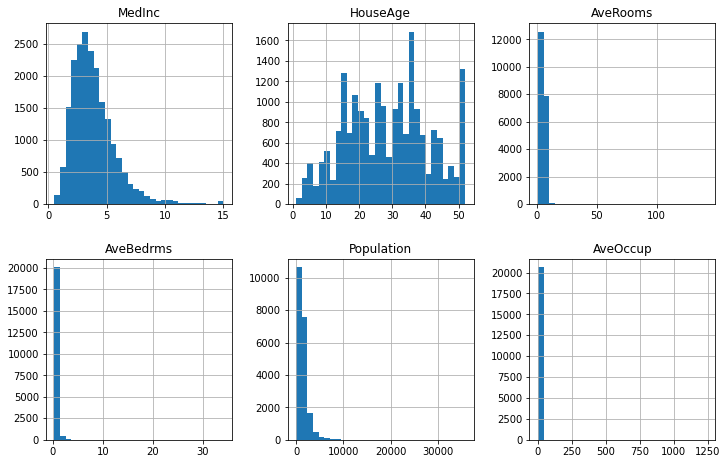

In [3]:
# Plot histograms to inspect variable distributions

X.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [4]:
# capture variable names in a list

variables = list(X.columns)

variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [5]:
# Make Q-Q plots for all variables


def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        # location in figure
        ax = plt.subplot(2, 3, i + 1)

        # variable to plot
        var = variables[i]

        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        # add variable name as title
        ax.set_title(var)

    plt.show()

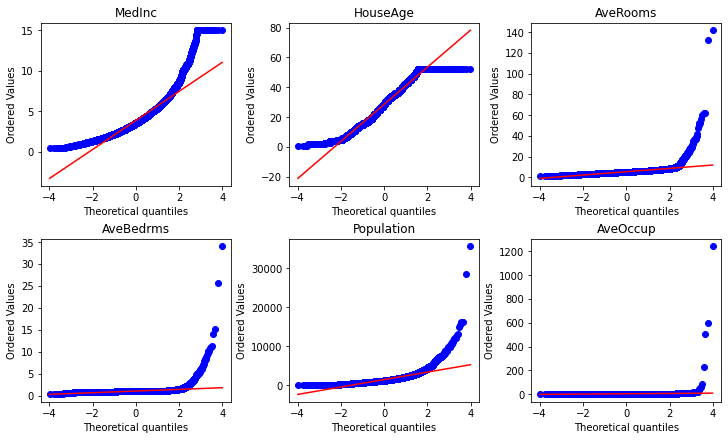

In [6]:
make_qqplot(X)

# Box-Cox transformation with Feature-engine

In [7]:
# set up the transformer: automatically identifies numerical variables

bct = BoxCoxTransformer()

# fit transformer to the data set
bct.fit(X)

BoxCoxTransformer()

In [8]:
# the exponents for each variable

bct.lambda_dict_

{'MedInc': 0.09085449361507383,
 'HouseAge': 0.8093980940712507,
 'AveRooms': -0.2980048976549959,
 'AveBedrms': -1.6290002625859639,
 'Population': 0.23576757812051324,
 'AveOccup': -0.4763032278973292}

In [9]:
# transform variables: returns a new dataframe

X_tf = bct.transform(X)

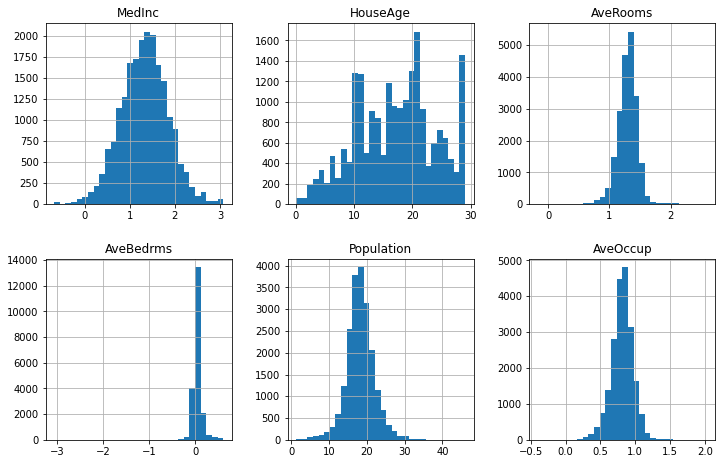

In [10]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

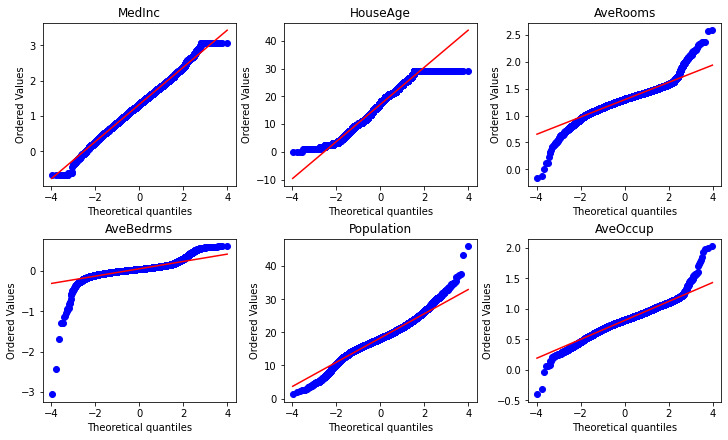

In [11]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)